Try to present an intuition for Gaussian or normal distributions as the effect of many unknown small decisions on a final outcome. But remember that by definition, the model isn't good at surprises, or big decisions or events. In other words, the tails are too thin unless we are very, very confident that there are no other ways the outcome can be modified. 

## The drunken sailor metaphor

We don't know where he will end up but we're confident that his legs are a similar length (constant variance assumption) and that's all we need to know to be able to imagine a range of possible destinations, and their plausability.

In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from scipy import stats as stats

from typing import Tuple, Union

Remember first how a Bernoulli random variable works. It's a weighted coin toss where $p$ is the bias of the coin with $p=0.5$ being an unbiased coin that is equally likely to land _heads_ (or $1$) as _tails_ ($0$).

In [2]:
# Let's ask 5 people to toss a coin 3 times 
stats.bernoulli(p=0.5).rvs(size=(5,3))
# often useful to convert (0,1) to (-1,1)
def bernoulli_pos_neg(p: float, size: Union[int, Tuple[int, ...]]) -> np.ndarray:
    """Uses the Bernoulli random variable to generate a random array of -1s and +1s."""
    return stats.bernoulli(p=p).rvs(size=size) * 2 - 1

bernoulli_pos_neg(p=0.5, size=(5,3))

array([[ 1, -1, -1],
       [ 1, -1, -1],
       [ 1, -1, -1],
       [ 1, -1, -1],
       [ 1,  1,  1]])

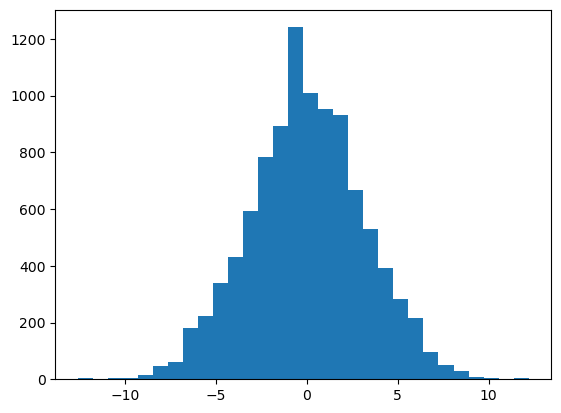

In [9]:
n_sailors = 10_000
n_steps = 1_000
step_size = 0.1

positions = step_size * bernoulli_pos_neg(p=0.5, size=(n_sailors, n_steps))
plt.hist(positions.sum(axis=1), bins=30) # sum by sailors not by steps
plt.show()


Text(0.5, 1.0, 'The final destination distribution')

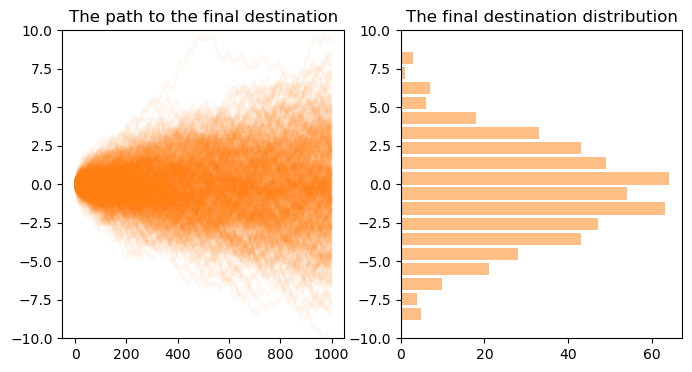

In [11]:
first_n_sailors = 500
# Let's plot the paths
lines = positions.cumsum(axis=1)
lines = lines[:first_n_sailors]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plt.sca(axs[0])
steps = range(n_steps)
for i in range(len(lines)):
    plt.plot(steps, lines[i], label=f"sailor {i}", color='C1', alpha=0.05)
plt.ylim(-10,10)
plt.title("The path to the final destination")

plt.sca(axs[1])
counts, edges = np.histogram(lines[:,-1], bins=20)
plt.barh(edges[:-1], counts, color='C1', alpha=0.5)
plt.ylim(-10,10)
plt.title("The final destination distribution")


But what if once in a while the sailors grow an Inspector Gadget leg?
That is the step size is not constant, and our assumption of constant variance does not hold



In [12]:
n_sailors = 10_000
n_steps = 1_000
# This the step size is an array with one row per sailor, one column per step,
# and the step size might randomly be an inspector gadget event
step_choices = [0.1, 10]
step_choices_probabilities = [0.99, 0.01]
step_size = np.random.choice(step_choices, p=step_choices_probabilities, size=(n_sailors, n_steps))
pl.DataFrame(step_size).head()


column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_963,column_964,column_965,column_966,column_967,column_968,column_969,column_970,column_971,column_972,column_973,column_974,column_975,column_976,column_977,column_978,column_979,column_980,column_981,column_982,column_983,column_984,column_985,column_986,column_987,column_988,column_989,column_990,column_991,column_992,column_993,column_994,column_995,column_996,column_997,column_998,column_999
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,…,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,10.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,…,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,10.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,…,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,…,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,10.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,…,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


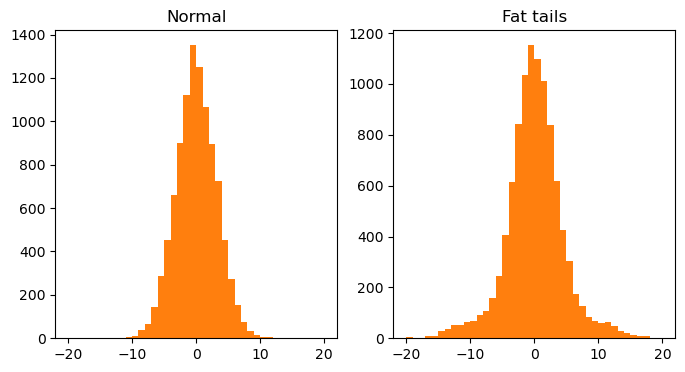

In [96]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# Normal
step_choices = [0.1, 10]
step_choices_probabilities = [1.00, 0.00]
step_size = np.random.choice(step_choices, p=step_choices_probabilities, size=(n_sailors, n_steps))
positions = step_size * bernoulli_pos_neg(p=0.5, size=(n_sailors, n_steps))
plt.sca(axs[0])
plt.hist(positions.sum(axis=1), bins=np.linspace(-20,20,41), color="C1") # sum by sailors not by steps
plt.title("Normal")

# Fat tails ... just a 1 in a ten-thousand chance
step_choices = [0.1, 10]
step_choices_probabilities = [0.9999, 0.0001]
step_size = np.random.choice(step_choices, p=step_choices_probabilities, size=(n_sailors, n_steps))
positions = step_size * bernoulli_pos_neg(p=0.5, size=(n_sailors, n_steps))
plt.sca(axs[1])
plt.hist(positions.sum(axis=1), bins=np.linspace(-20,20,41), color="C1") # sum by sailors not by steps
plt.title("Fat tails")

plt.show()